In [191]:
#Univariate Analysis
#Loading the data
import pandas as pd
train=pd.read_csv('train_file.csv')
test=pd.read_csv('test_file.csv')

In [192]:
#Looking at the data types of each column
train.dtypes

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

In [193]:
train.describe()

,ID,Age,Hours.Per.Week
count,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,40.437456
std,9399.695394,13.640433,12.347429
min,1.000000,17.000000,1.000000
25%,8141.000000,28.000000,40.000000
50%,16281.000000,37.000000,40.000000
75%,24421.000000,48.000000,45.000000
max,32561.000000,90.000000,99.000000


In [194]:
#Get te list of categorical variables
categorical_variables=train.dtypes.loc[train.dtypes=='object'].index
print(categorical_variables)

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')


In [195]:
#Use apply function to get number of unique values in each column
train[categorical_variables].apply(lambda x:len(x.unique()))

Workclass          9
Education         16
Marital.Status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native.Country    42
Income.Group       2
dtype: int64

In [196]:
#Print counts of each category
train['Race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

In [197]:
#Print the percentage of observations in each category
train['Race'].value_counts()/train.shape[0]

White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: Race, dtype: float64

In [198]:
#Print the counts of each country
train['Native.Country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [199]:
#Print the percentage of observations in each country
train['Native.Country'].value_counts()/train.shape[0]

United-States                 0.895857
Mexico                        0.019748
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                     0.001044
Peru                     

In [200]:
#Multivariate Analysis
#Both Categorical
#Print cross-tabulation
ct=pd.crosstab(train['Sex'], train['Income.Group'], margins=True)
print(ct)

Income.Group  <=50K  >50K    All
Sex                             
Female         9592  1179  10771
Male          15128  6662  21790
All           24720  7841  32561


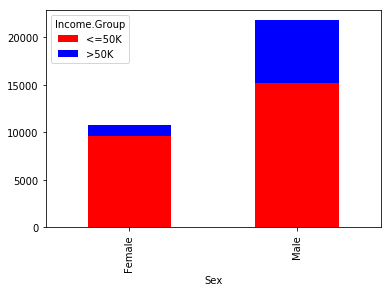

In [201]:
#Plotting the above using stacked chart
%matplotlib inline
ct.iloc[:-1,:-1].plot(kind='bar',stacked=True,color=['red','blue'], grid=False)

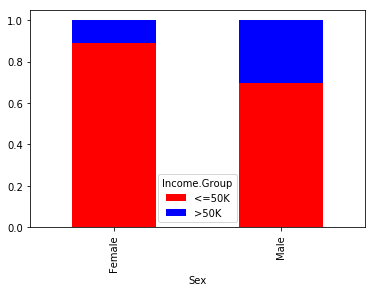

In [202]:
#Plotting percentage of males and females in each income group
def percConvert(ser):
    return ser/float (ser[-1])
ct2=ct.apply(percConvert,axis=1)
ct2.iloc[:-1,:-1].plot(kind='bar', stacked= True, color=['red', 'blue'], grid=False)

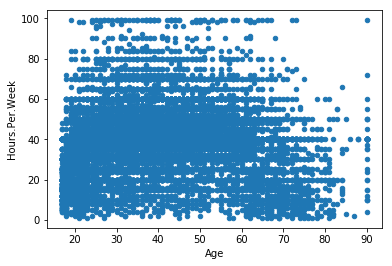

In [203]:
#Both Continuous
#Plotting a Scatter Chart
train.plot('Age', 'Hours.Per.Week',kind='scatter')

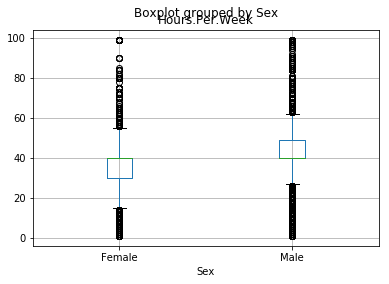

In [204]:
#Categorical-Continuous combination
#Box plot
train.boxplot(column='Hours.Per.Week', by='Sex')


In [205]:
#Missing Values Treatment
#Checking the missing values in training data
train.apply(lambda x:sum(x.isnull()))

ID                   0
Age                  0
Workclass         1836
Education            0
Marital.Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours.Per.Week       0
Native.Country     583
Income.Group         0
dtype: int64

In [206]:
#Checking the missing values in testing data
test.apply(lambda x:sum(x.isnull()))

ID                  0
Age                 0
Workclass         963
Education           0
Marital.Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Hours.Per.Week      0
Native.Country    274
dtype: int64

In [207]:
#Imputation with mode
#from scipy.stats import mode
from statistics import mode
mode([1,2,3,3,3,4,4,5])

mode(train['Workclass'])

'Private'

In [208]:
#Impute the values
var_to_impute=['Workclass','Occupation','Native.Country']
for var in var_to_impute:
    train[var].fillna(mode(train[var]), inplace=True)
    test[var].fillna(mode(test[var]), inplace=True)

In [209]:
#Check the missing values in train to confirm
train.apply(lambda x:sum(x.isnull()))

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
Income.Group      0
dtype: int64

In [210]:
#Check the missing values in test to confirm
test.apply(lambda x:sum(x.isnull()))

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
dtype: int64

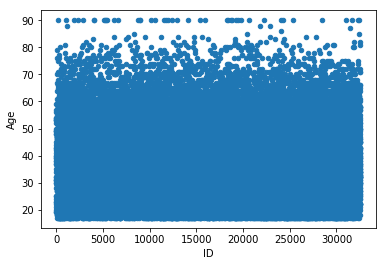

In [211]:
#Outlier treatment
#checking outliers in numerical variables by creating simple scatter plots
#Making a scatter plot for Age
train.plot('ID','Age',kind='scatter')

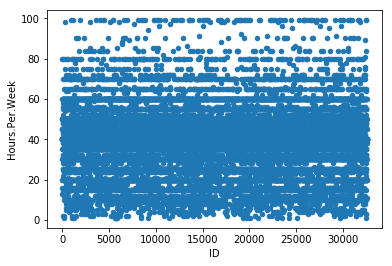

In [212]:
#Making a scatter plot for Hours.Per.Week
train.plot('ID','Hours.Per.Week',kind='scatter')

In [213]:
#Variable Transformation  
#Variable Transformation is not only about creating new variables, but also making the available information more 
#sensible. This stage involves making new variables using existing variables or perform some numerical transformations 
#on variables like taking a log.
#Checking datatypes of available variables
train.dtypes

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

In [214]:
#Determine the percentage of observations in each category
train['Workclass'].value_counts()/train.shape[0]

Private             0.753417
Self-emp-not-inc    0.078038
Local-gov           0.064279
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: Workclass, dtype: float64

In [215]:
#Depending on the business scenario, we can combine the categories with very few observations. 
#As a thumbrule, lets combine categories with less than 5% of the values.
categories_to_combine=['State-gov','Self-emp-inc','Federal-gov','Without-pay','Never-worked']

In [216]:
#Run a loop to replace all values with others
for cat in categories_to_combine:
    train['Workclass'].replace({cat:'Others'}, inplace=True)
    test['Workclass'].replace({cat:'Others'}, inplace=True)

In [217]:
#Check the new categories in train
train['Workclass'].value_counts()/train.shape[0]

Private             0.753417
Others              0.104266
Self-emp-not-inc    0.078038
Local-gov           0.064279
Name: Workclass, dtype: float64

In [218]:
#Check the new categories in test
test['Workclass'].value_counts()/test.shape[0]

Private             0.747681
Others              0.107119
Self-emp-not-inc    0.081138
Local-gov           0.064062
Name: Workclass, dtype: float64

In [219]:
#Combining the rest of categorical variables
#Make a list of categorical variables
categorical_variables=list(train.dtypes.loc[train.dtypes=='object'].index)
categorical_variables


['Workclass',
 'Education',
 'Marital.Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native.Country',
 'Income.Group']

In [220]:
#categorical_variables2=list(test.dtypes.loc[test.dtypes=='object'].index)
#categorical_variables2

In [221]:
#Remove Workclass because it is already done
categorical_variables=categorical_variables[1:]
categorical_variables

['Education',
 'Marital.Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native.Country',
 'Income.Group']

In [222]:
#categorical_variables2=categorical_variables2[1:]
#categorical_variables2

In [223]:
#Check the current number of unique values
train[categorical_variables].apply(lambda x: len(x.unique()))

Education         16
Marital.Status     7
Occupation        14
Relationship       6
Race               5
Sex                2
Native.Country    41
Income.Group       2
dtype: int64

In [224]:
#test[categorical_variables2].apply(lambda x: len(x.unique()))

In [225]:
#Run a loop over these values and combine categories
for column in categorical_variables:
    #Determine the categories to combine
    frq=train[column].value_counts()/train.shape[0]
    categories_to_combine=frq.loc[frq.values<0.05].index
    
    #Loop to combine into Others
    for cat in categories_to_combine:
        train[column].replace({cat:'Others'}, inplace=True)

#for column2 in categorical_variables2:
    #frq2=test[column2].value_counts()/test.shape[0]
    #categories_to_combine2=frq2.loc[frq2.values<0.05].index
    
    #for cat2 in categories_to_combine2:
        #test[column2].replace({cat2:'Others'}, inplace=True)

In [226]:
#Check the result for train data
train[categorical_variables].apply(lambda x:len(x.unique()))

Education         5
Marital.Status    4
Occupation        8
Relationship      5
Race              3
Sex               2
Native.Country    2
Income.Group      2
dtype: int64

In [227]:
#Check the reult for test data
#test[categorical_variables2].apply(lambda x:len(x.unique()))

In [228]:
#Predictive Modelling
#Data Preprocessing
#sklearn provides a function LabelEncoder for converting categories to numbers in range 0,1..(N-1) 
#where N is the number of categories.
from sklearn.preprocessing import LabelEncoder

In [229]:
categorical_variables=train.dtypes.loc[train.dtypes=='object'].index
categorical_variables

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')

In [230]:
categorical_variables2=test.dtypes.loc[test.dtypes=='object'].index
categorical_variables2

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country'],
      dtype='object')

In [231]:
#Convert them using LabelEncoder
le=LabelEncoder()
for var in categorical_variables:
    train[var]=le.fit_transform(train[var])
for var2 in categorical_variables2:
    test[var2]=le.fit_transform(test[var2])

In [232]:
#Check using dtypes
train.dtypes

ID                int64
Age               int64
Workclass         int64
Education         int64
Marital.Status    int64
Occupation        int64
Relationship      int64
Race              int64
Sex               int64
Hours.Per.Week    int64
Native.Country    int64
Income.Group      int64
dtype: object

In [233]:
#test.dtypes

In [234]:
#Fit the model
#Using sklearn's DecisionTreeClassifier to make a decision tree.
from sklearn.tree import DecisionTreeClassifier


In [235]:
#Define the predictors which will be all variables except ID and target variable
dependent_variable='Income.Group'
independent_variable=[x for x in train.columns if x not in ['ID',dependent_variable]]
independent_variable

['Age',
 'Workclass',
 'Education',
 'Marital.Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Hours.Per.Week',
 'Native.Country']

In [236]:
#Now that we have the predictors, lets run the model with the following benchmark parameters:
#max_depth = 10
#min_samples_leaf = 100
#max_features = 'sqrt'
#Initialise the Algorithm
model=DecisionTreeClassifier(max_depth=10,min_samples_leaf=100,max_features='sqrt')
#Fit the Algorithm
model.fit(train[independent_variable],train[dependent_variable])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [237]:
#Make Predictions using predict function
predictions_train=model.predict(train[independent_variable])
predictions_test=model.predict(test[independent_variable])


In [238]:
#Analyze Results
from sklearn.metrics import accuracy_score

In [239]:
#Determine the train error
acc_train=accuracy_score(train[dependent_variable],predictions_train)
print ('Train Accuracy:%f'%acc_train)

Train Accuracy:0.813857


In [240]:
predictions_test

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [241]:
#import numpy as np
#a=np.predictions_test
    
predictions_test=list(map(str,predictions_test))
length=len(predictions_test)
for i in range(0,length):
        if predictions_test[i]=='0':
            predictions_test[i]='<=50K' 
        else: 
            if predictions_test[i]=='1':
                predictions_test[i]='>50K'

#predictions_test

        

In [242]:
submission = pd.DataFrame({
        "ID": test["ID"],
        "Income.Group": predictions_test
    })
submission.to_csv('lalji_submission.csv', index=False)
    
